In [79]:
import numpy as np
import pandas as pd

drone_data = pd.read_csv(filepath_or_buffer="drone_logs/2020-09-29_15-18-15_v2.csv")
drone = pd.DataFrame(drone_data)
drone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729 entries, 0 to 4728
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   latitude                          4729 non-null   float64
 1   longitude                         4729 non-null   float64
 2   altitude(m)                       4729 non-null   float64
 3   ultrasonicHeight(m)               4729 non-null   float64
 4   speed(mps)                        4729 non-null   float64
 5   distance(m)                       4729 non-null   float64
 6   max_altitude(m)                   4729 non-null   float64
 7   max_ascent(m)                     4729 non-null   float64
 8   max_speed(mps)                    4729 non-null   float64
 9   max_distance(m)                   4729 non-null   float64
 10  time(millisecond)                 4729 non-null   int64  
 11  datetime(utc)                     4729 non-null   object 
 12  dateti

In [80]:
def timestamp_format(timestamp):
    return pd.Timestamp(" ".join(timestamp.strip("Z").split("T")).split(".")[0])

temp = drone.copy()
temp["datetime(utc)"] = temp["datetime(utc)"].map(timestamp_format)
temp["datetime(utc)"]

0      2020-09-29 13:18:15
1      2020-09-29 13:18:15
2      2020-09-29 13:18:15
3      2020-09-29 13:18:15
4      2020-09-29 13:18:15
               ...        
4724   2020-09-29 13:27:11
4725   2020-09-29 13:27:11
4726   2020-09-29 13:27:11
4727   2020-09-29 13:27:11
4728   2020-09-29 13:27:12
Name: datetime(utc), Length: 4729, dtype: datetime64[ns]

In [81]:
temp.drop_duplicates(subset="datetime(utc)" ,inplace=True)

In [82]:
temp["latitude"]

0       51.519522
9       51.519523
19      51.519524
29      51.519524
39      51.519523
          ...    
4688    51.519462
4698    51.519462
4708    51.519462
4718    51.519462
4728    51.519463
Name: latitude, Length: 504, dtype: float64

In [83]:
np.random.seed(10)

n = temp.shape[0]

lat = temp["latitude"].values + np.random.normal(0, 0.00003, n)
lon = temp["longitude"].values + np.random.normal(0, 0.00003, n)
alt = temp["altitude(m)"].values + np.random.normal(0, 0.00003, n)

In [84]:
# xyz = temp[["latitude", "longitude", "altitude(m)"]].values + np.random.normal(0, 0.0003, (n, 3))

In [85]:
temp["datetime(utc)"].unique()


array(['2020-09-29T13:18:15.000000000', '2020-09-29T13:18:16.000000000',
       '2020-09-29T13:18:17.000000000', '2020-09-29T13:18:18.000000000',
       '2020-09-29T13:18:19.000000000', '2020-09-29T13:18:20.000000000',
       '2020-09-29T13:18:21.000000000', '2020-09-29T13:18:22.000000000',
       '2020-09-29T13:18:23.000000000', '2020-09-29T13:18:24.000000000',
       '2020-09-29T13:18:25.000000000', '2020-09-29T13:18:26.000000000',
       '2020-09-29T13:18:27.000000000', '2020-09-29T13:18:28.000000000',
       '2020-09-29T13:18:29.000000000', '2020-09-29T13:18:30.000000000',
       '2020-09-29T13:18:31.000000000', '2020-09-29T13:18:32.000000000',
       '2020-09-29T13:18:33.000000000', '2020-09-29T13:18:34.000000000',
       '2020-09-29T13:18:35.000000000', '2020-09-29T13:18:36.000000000',
       '2020-09-29T13:18:37.000000000', '2020-09-29T13:18:38.000000000',
       '2020-09-29T13:18:39.000000000', '2020-09-29T13:18:40.000000000',
       '2020-09-29T13:18:41.000000000', '2020-09-29

In [86]:
# mask = (temp["datetime(utc)"] > "2020-09-29 13:20:15") & (temp["datetime(utc)"] <= "2020-09-29 13:22:25")
# temp = temp.loc[mask]
temp.to_csv("out", index=False)

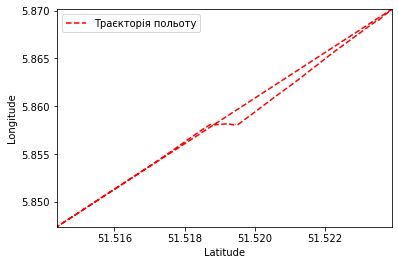

In [87]:
import matplotlib.pyplot as plt

plt.plot(temp["latitude"], temp["longitude"], c= "red", linestyle="dashed")
# plt.plot(drone["latitude"], drone["longitude"], c="#24ad32")
# plt.scatter(lat, lon, s=30, c="blue", marker="x")

plt.xlim([min(temp["latitude"]), max(temp["latitude"])])
plt.ylim([min(temp["longitude"]), max(temp["longitude"])])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
# plt.legend(["truth ground", "FK", "radar data"])
plt.legend(["Траєкторія польоту", "Локалізована траєкторія", "Виміри РЛС"])
# plt.savefig("zoomed",  bbox_inches='tight')
plt.show()

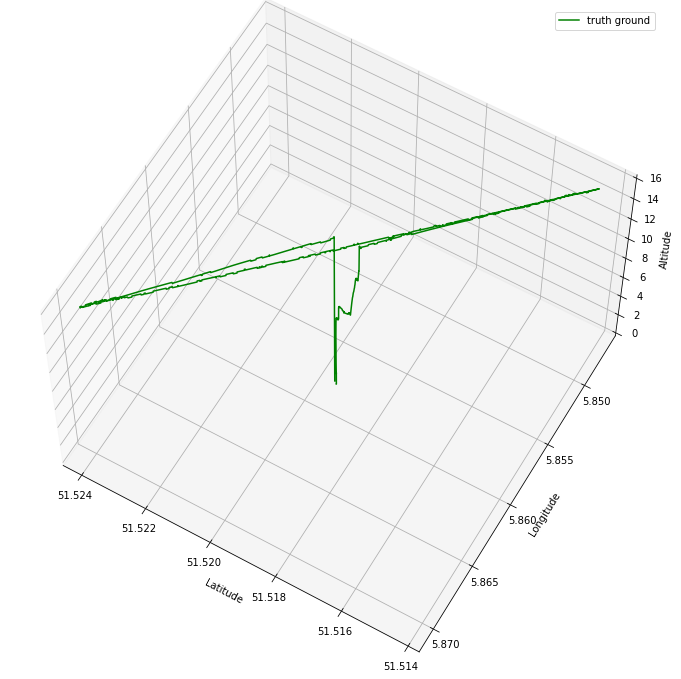

In [88]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')

ax.plot3D(drone["latitude"], drone["longitude"], drone["altitude(m)"], c="green")

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Altitude")

ax.view_init(60, 120)
plt.savefig("drone.png", bbox_inches='tight', dpi=fig.dpi)
plt.legend(["truth ground"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

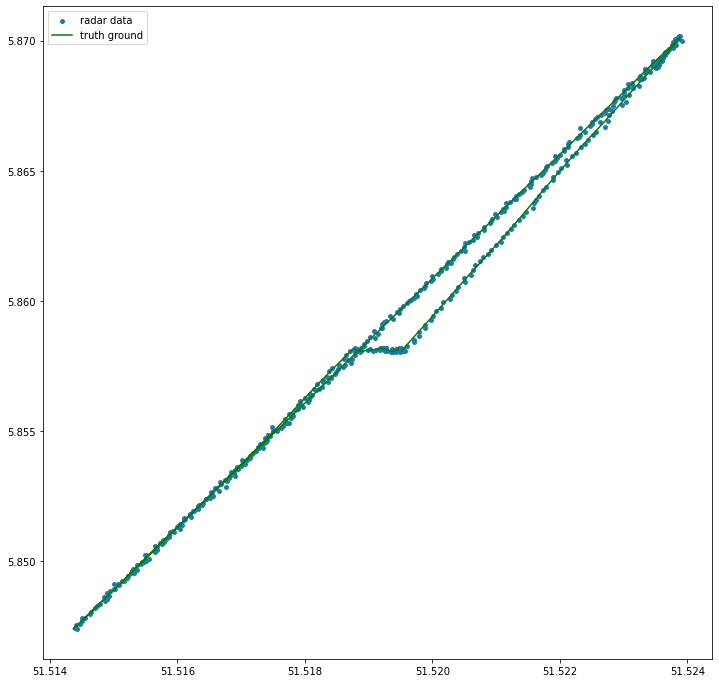

In [89]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(lat, lon, s=15)
plt.plot(drone["latitude"], drone["longitude"], "green")
plt.legend(["radar data", "truth ground"])
plt.show

In [90]:
z = np.vstack((lat, lon, alt)).T

In [91]:
from fk import KalmanFilter

kf = KalmanFilter(mes_noise=8, mod_noise=0.3)
kf.first_observation(z[0, :].reshape(3, -1))

In [92]:
pred = [kf.X_hat_prev]

for zi in z[1:, :]:
    x_hat_next, p_next = kf.prediction()
    x, p = kf.update(x_hat_next, p_next, zi.reshape(3, -1))
    kf.P, kf.X_hat_prev = p, x
    pred.append(x_hat_next)

In [93]:
pred = np.array(pred).reshape(-1, 3)

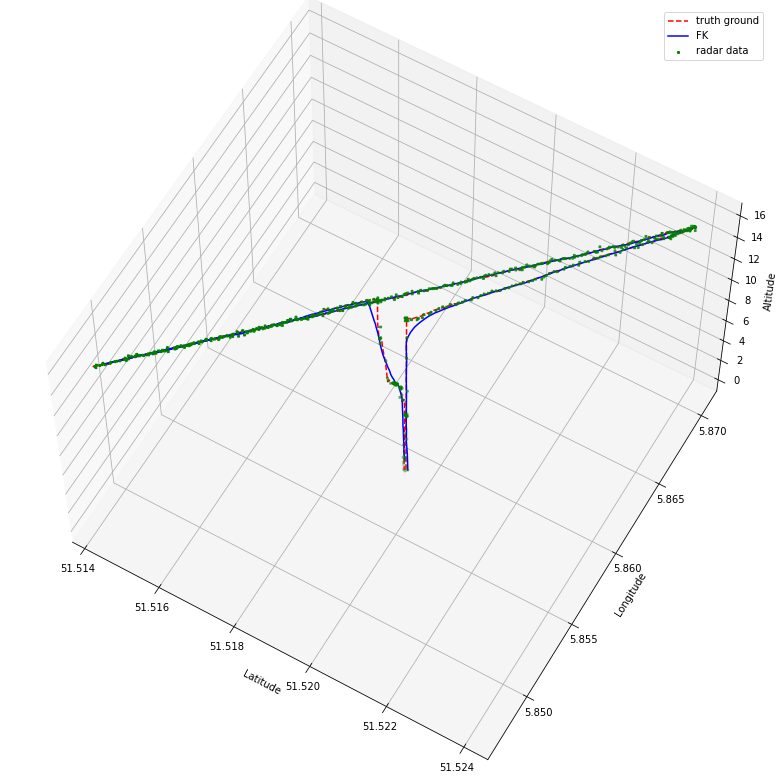

In [94]:
fig = plt.figure(figsize=(14, 14))
ax = plt.axes(projection='3d')

ax.plot3D(drone["latitude"], drone["longitude"], drone["altitude(m)"], c= "red", linestyle="dashed")
ax.plot3D(pred[:, 0], pred[:, 1], pred[:, 2], c="blue")
ax.scatter3D(lat, lon, alt, s=5, c="green", marker="x")

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Altitude")

ax.view_init(60, 300)
plt.legend(["truth ground", "FK", "radar data"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

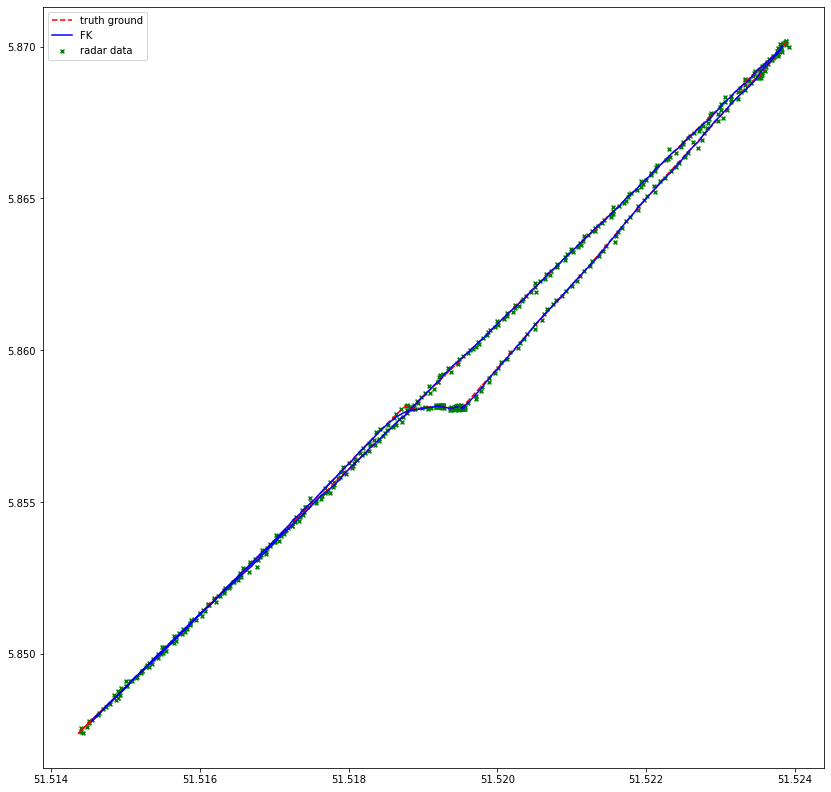

In [95]:
fig = plt.figure(figsize=(14, 14))
plt.plot(drone["latitude"], drone["longitude"], c= "red", linestyle="dashed")
plt.plot(pred[:, 0], pred[:, 1], c="blue")
plt.scatter(lat, lon, s=15, c="green", marker="x")
plt.legend(["truth ground", "FK", "radar data"])
plt.savefig("predicted",  bbox_inches='tight')
plt.show

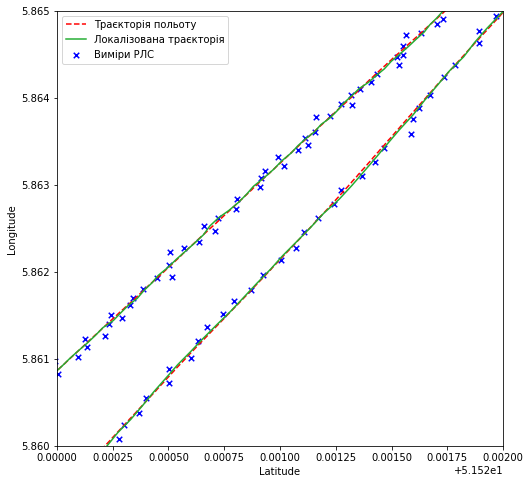

In [96]:
plt.figure(figsize=(8, 8))

plt.plot(drone["latitude"], drone["longitude"], c= "red", linestyle="dashed")
plt.plot(pred[:, 0], pred[:, 1], c="#24ad32")
plt.scatter(lat, lon, s=30, c="blue", marker="x")

plt.xlim([51.52, 51.522])
plt.ylim([5.86, 5.865])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
# plt.legend(["truth ground", "FK", "radar data"])
ax.legend(["Траєкторія польоту", "Локалізована траєкторія", "Виміри РЛС"])
plt.legend(["Траєкторія польоту", "Локалізована траєкторія", "Виміри РЛС"])
plt.savefig("zoomed",  bbox_inches='tight')
plt.show()